## Data Manipulation Language

### SQL DML: Data Manipulation Language

https://www.youtube.com/watch?v=n_itazcrlCw

In this lesson, we'll be learning how to use the SQL DML — Data Manipulation Language — in order to add (`INSERT`), modify (`UPDATE`), and remove (`DELETE`) data from the database tables we now know how to create.

While manipulating data, it's often the case that we need to use functions in order to transform that data. As part of the lesson, we'll be learning about various functions that can act on strings, numbers, and dates.

## Inserting Data in Postgres: Form One

https://www.youtube.com/watch?v=p7KpqKJHXSU

The first form of the `INSERT` command we're looking at is: `INSERT INTO table (column list) VALUES (first row of values), ...`.

When using this form, the column list is optional: if it's not provided, we're saying that we want to assign values to every column of the table, in the order where they're defined.

When we do include a list of columns, we can decide to skip some columns. If we do, then Postgres will insert the default value assigned to that column in the table definition. One place where this often happens is for a `SERIAL` column, where the default value is the next integer in the sequence that was created for that column.

https://www.youtube.com/watch?v=Lmq4vd60bsc

Inserting values manually in a `SERIAL` column is perfectly fine by Postgres, since that column is in fact a simple `INTEGER` with a default value. Postgres won't prevent a `SERIAL` column from having duplicate values. We'll see how to do that in the next lesson by using constraints.

https://www.youtube.com/watch?v=r11FWCmqRmc

We can use the `DEFAULT` keyword as part of a list of values when inserting new rows of data. This would be the same as skipping the column, but can be useful when we want to insert multiple rows with some having the default value and others having a specified value.

Follow this link for the full [Postgres `INSERT` documentation](https://www.postgresql.org/docs/9.6/sql-insert.html).

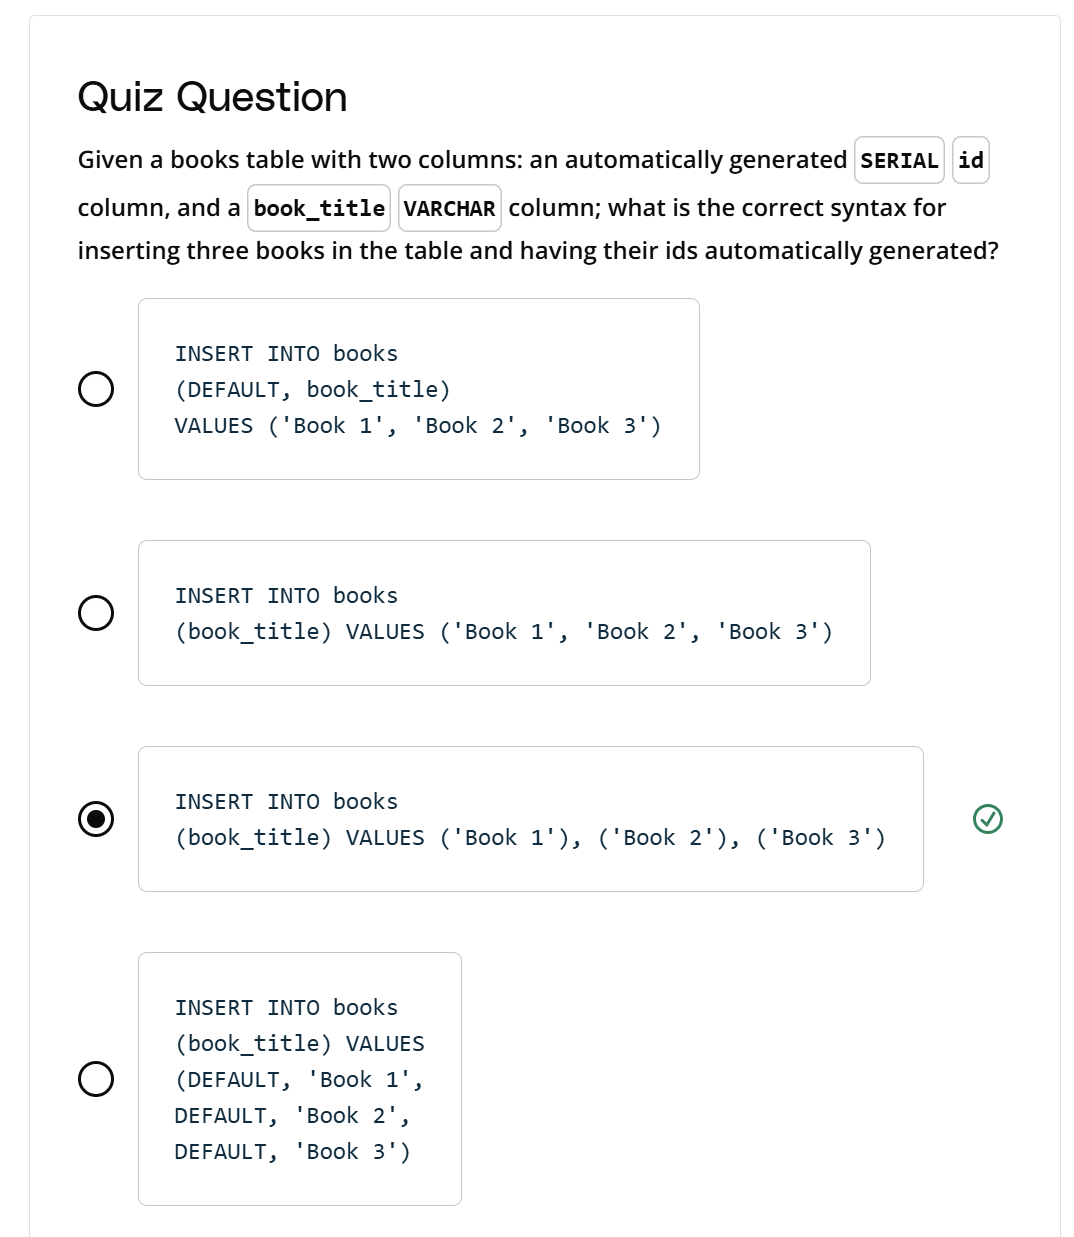

## Inserting Data in Postgres: Form Two

https://www.youtube.com/watch?v=bpKfWrsoCa8

Postgres also allows a second form for inserting data, where we feed the result of a regular `SELECT` query to the `INSERT` command. This form is really useful for migrating data from one table to another while transforming it.

https://www.youtube.com/watch?v=m12ZwmmY3SU

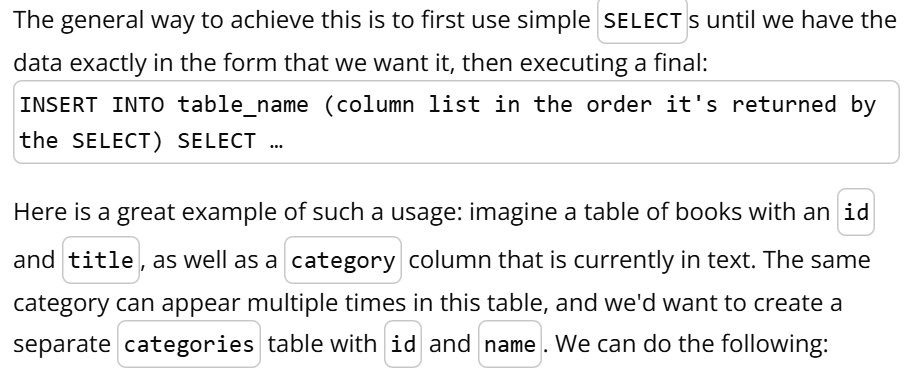

In [ ]:
INSERT INTO "categories" ("name") SELECT DISTINCT "category" FROM "books"


The `categories` table will be filled with all distinct categories from the book table, and each will be assigned a unique ID using the `SERIAL` column. After that, we can update the `books` table with a `category_id` column, something we'll learn how to do in an upcoming video.

## Inserting Data in Postgres: Quizzes

When would you use INSERT ... VALUES vs. INSERT ... SELECT?

`INSERT … VALUES` would be used when introducing new data in a table; this data would come from an external source like an application.

`INSERT … SELECT` would be used when taking already existing data from a table and migrating it — most often with some modifications or clean-ups — into an already existing table.



## Exercise: Inserting Data in Postgres

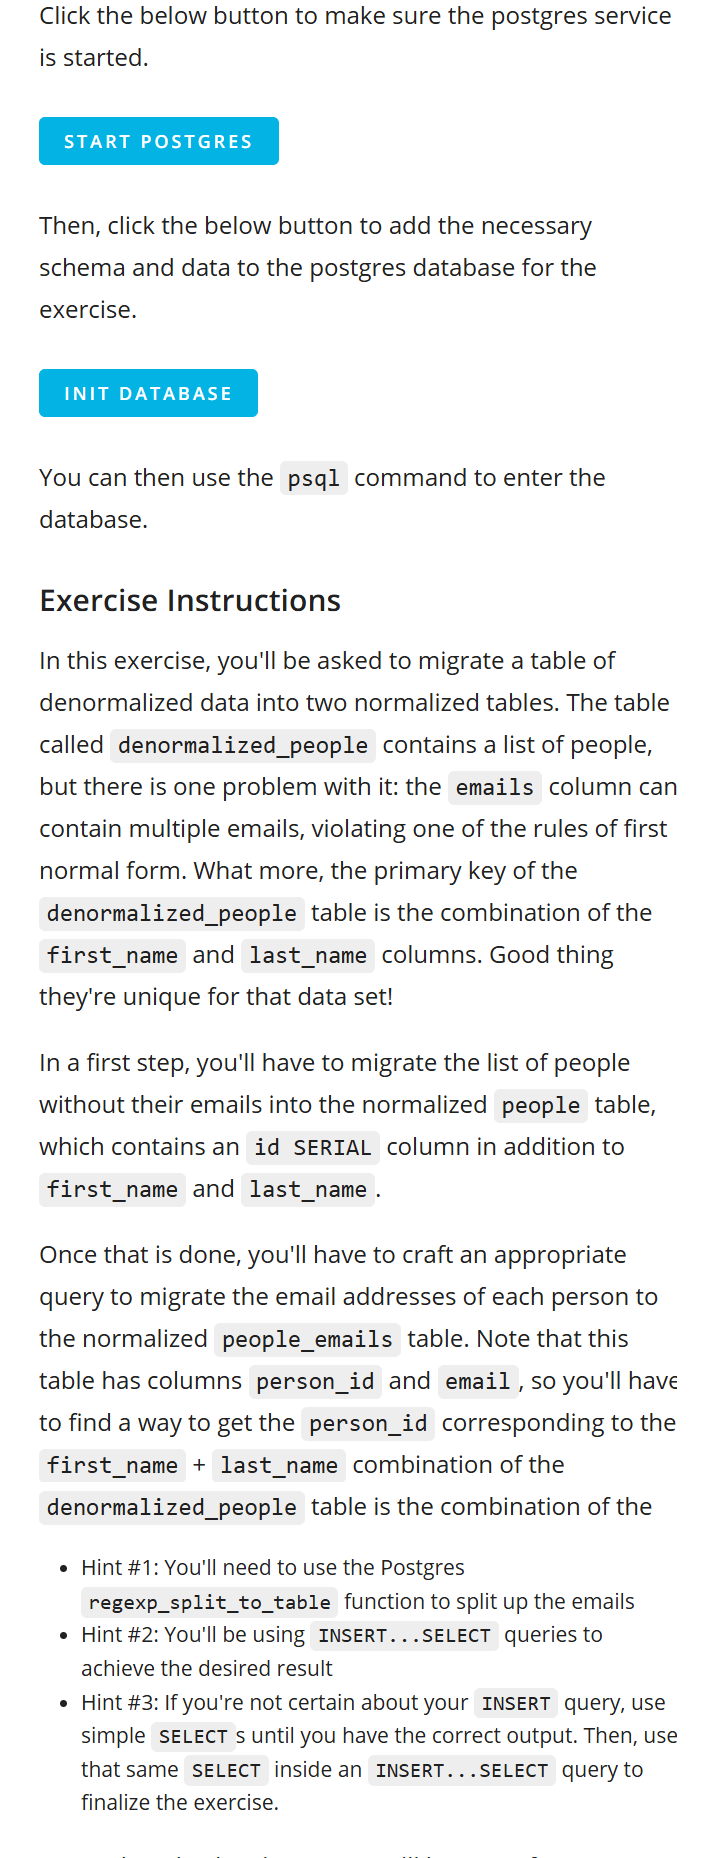

## Solution: Inserting Data in Postgres

### Inserting Data: Exercise Solution

https://www.youtube.com/watch?v=qlqv2Ej3ye8

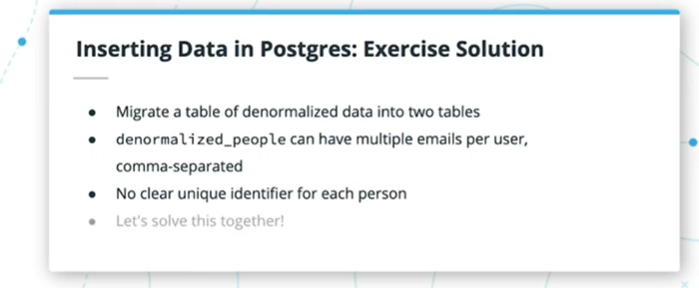

https://www.youtube.com/watch?v=qlqv2Ej3ye8

As usual, it’s important to have first investigated the schema here - as you progress to more and more advanced schemas even outside of the course, you’ll want to know the schema inside and out before making changes.

https://www.youtube.com/watch?v=Z-uJROp8XKM

The first piece was fairly straightforward in migrating people’s names.

In [ ]:
-- Migrate people
INSERT INTO "people" ("first_name", "last_name")
  SELECT "first_name", "last_name" FROM "denormalized_people";

The second piece got more advanced, where it’s much more useful to try some `SELECT` statements to make sure you are grabbing the correct data before making an `INSERT`. Let’s finish this up below.

https://www.youtube.com/watch?v=QAAfwyhRh3w

Here is the rest of my solution to this exercise (note my aliasing of “people” as “p” and “denormalized_people” as “dn”, which was just a personal preference):

In [ ]:
-- Migrate people's emails using the correct ID
INSERT INTO "people_emails"
SELECT
  "p"."id",
  REGEXP_SPLIT_TO_TABLE("dn"."emails", ',')
FROM "denormalized_people" "dn"
JOIN "people" "p" ON (
  "dn"."first_name" = "p"."first_name"
  AND "dn"."last_name" = "p"."last_name"
);

## Updating Data in Postgres

https://www.youtube.com/watch?v=26a1veUT8j0

The basic syntax for updating data in a table is: `UPDATE table_name SET col1=newval1, … WHERE …`.

The `WHERE` part of the syntax is exactly the same as for a `SELECT`. Among other things, if you don't include a `WHERE` clause, you'll be updating all the rows in the table, which is not often what you'd want to do!

-- Create users table

CREATE TABLE users (
    id SERIAL,
    name VARCHAR,
    happiness_level SMALLINT,
    mood VARCHAR
);

-- Insert data into users table

INSERT INTO users (name, happiness_level)
VALUES 
    ('User4', 12),
    ('User1', 50),
    ('User2', 75),
    ('User3', 89);

-- Create posts table

CREATE TABLE posts (
    id SERIAL,
    title TEXT,
    category VARCHAR
);

-- Insert data into posts table

INSERT INTO posts (title, category)
VALUES 
    ('First posts', 'General'),
    ('Second posts', 'Travel'),
    ('Third posts', 'Equipment'),
    ('4th posts', 'Travel'),
    ('lorem ipsum', 'Tips'),
    ('Amother post', 'Travel');

-- Create categories table

CREATE TABLE categories (
    id SERIAL,
    name VARCHAR
);


-- Insert data into categories table

INSERT INTO categories (name)
VALUES 
    ('Travel'),
    ('Equipment'),
    ('General'),
    ('Tips');

https://www.youtube.com/watch?v=lBy23y7XPOE

-- Update mood based on happiness_level

In [ ]:
UPDATE "users" SET "mood" = 'LOW' WHERE "happiness_level" < 33;
UPDATE "users" SET "mood" = 'Average' WHERE "happiness_level" BETWEEN 33 AND 65;
UPDATE "users" SET "mood" = 'Good' WHERE "happiness_level" >= 66;


-- Select all records from the users table

SELECT * FROM users;

Here, we’ve just covered some basic examples of setting values under a certain condition. For example, to update a table of “users” with columns of “mood” and “happiness_level”, we could update the “mood” where “happiness_level” is less than 33 to ‘Low’:

In [ ]:
UPDATE “users” SET “mood” = ‘Low’ WHERE “happiness_level” < 33;

https://www.youtube.com/watch?v=pdAuDAzTY00

-- Update mood to 'Excellent' for all users

UPDATE "users" SET "mood" = 'Excellent';

-- Select all records from the users table

SELECT * FROM users;

-- Update mood to 'Excellent' and set happiness_level to 100 for all users

UPDATE "users" SET "mood" = 'Excellent', "happiness_level" = 100;


-- Select all records from the users table

SELECT * FROM users;

Above, we covered a danger zone for using `UPDATE` - when a `WHERE` clause is not included, it will update every single row in the table. There are certainly situations where this might be desired, but usually this is not the case.

https://www.youtube.com/watch?v=RhJ2gNRRysI

-- Add category_id column to posts table

In [ ]:
ALTER TABLE "posts" ADD COLUMN "category_id" INTEGER;

-- Display the structure of the posts table

TABLE posts;

-- Update category_id in posts table based on category names

In [ ]:
UPDATE "posts" SET "category_id" = (
    SELECT "id" FROM "categories" WHERE "categories"."name" = "posts"."category"
);


-- Display the structure of the posts table

TABLE posts;

You can also use a sub-select as the value for updating a column, something very powerful! Inside your sub-select, referencing columns from the table you're updating will use the value for the row that's currently being updated.

Follow this link for the full [Postgres `UPDATE` documentation](https://www.postgresql.org/docs/9.6/sql-update.html).

## Updating Data in Postgres Quizzes

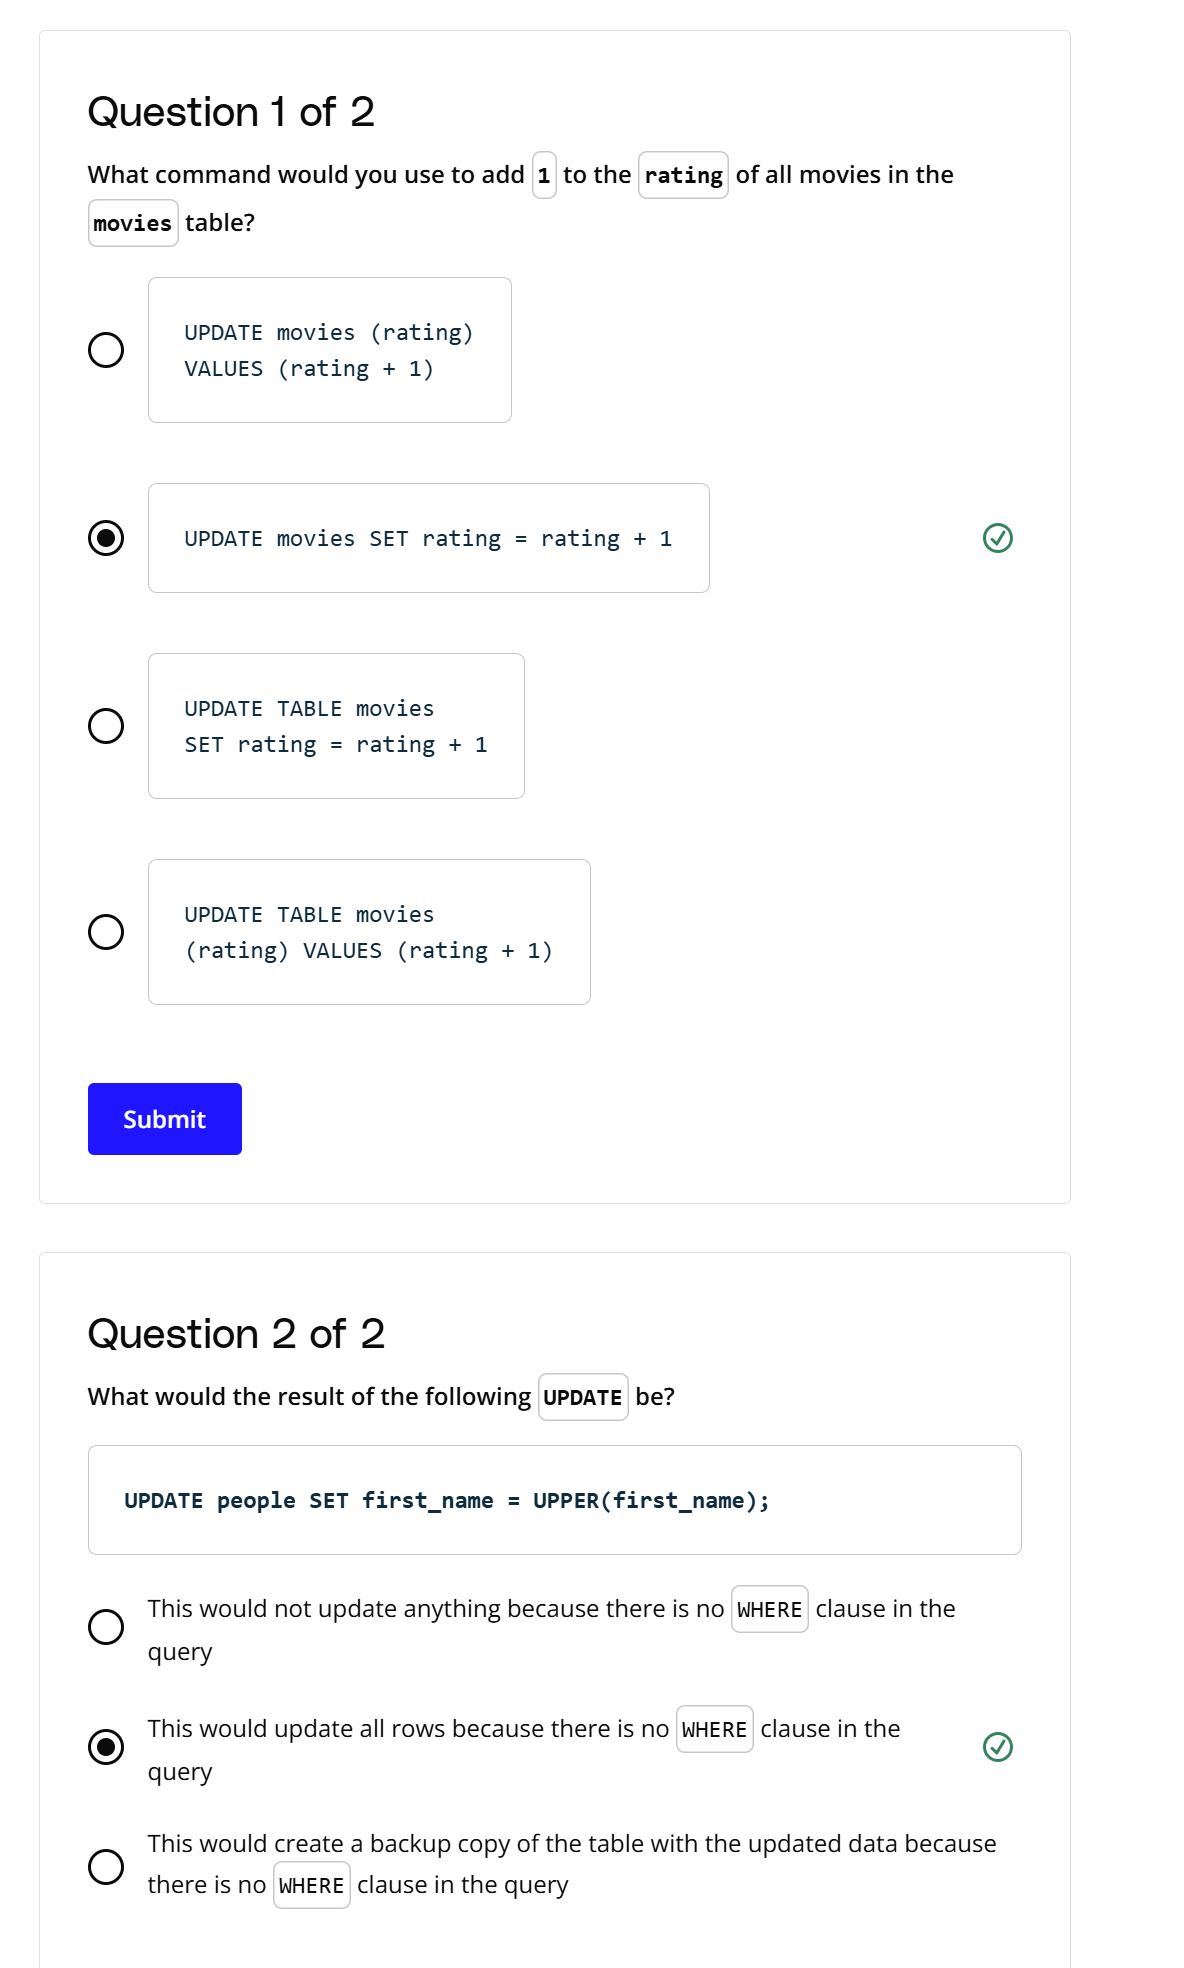

## Exercise: Updating Data in Postgres

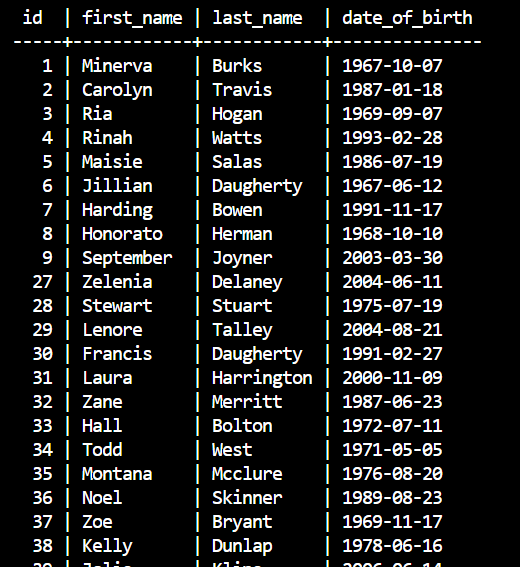

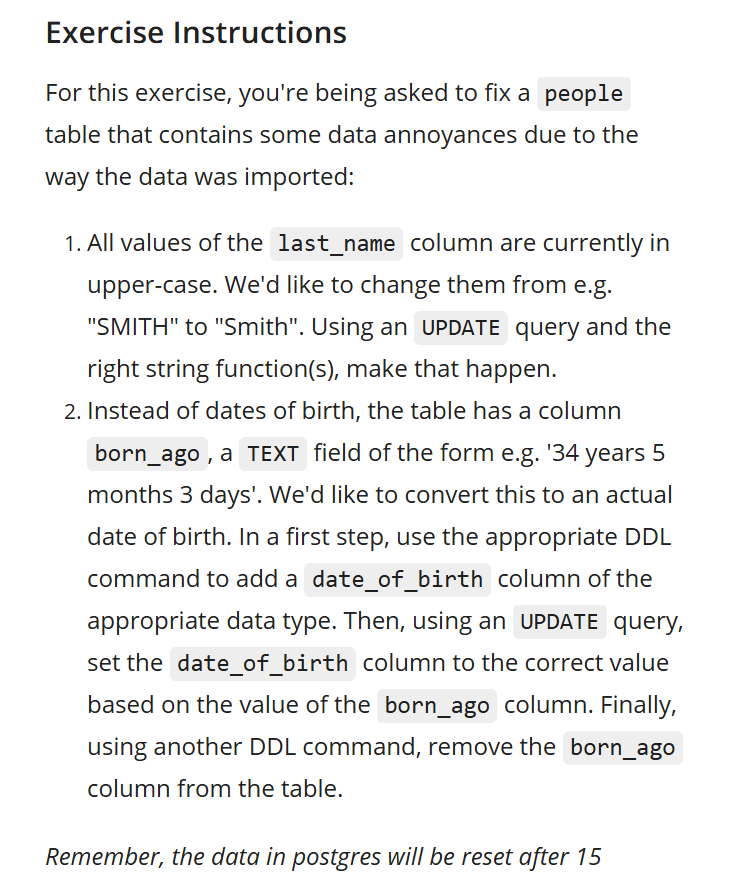

## Solution: Updating Data in Postgres

https://www.youtube.com/watch?v=-pl-fpbyKro

Pro tip: when faced with a new database or dataset, always explore it thoroughly before making any changes to it, or assumptions about it!

https://www.youtube.com/watch?v=1BedkII_V9w

The Postgres `SUBSTR` function is part of the expansive and powerful set of [Postgres String functions](https://www.postgresql.org/docs/9.1/functions-string.html). Postgres allows us to concatenate strings together by using the `||` operator. The expression `'string1' || 'string2'` yields the value `'string1string2'`. This operator can be chained as many times as needed.

https://www.youtube.com/watch?v=4GPTyNEa5ps

These are the commands to solve the exercise:

In [ ]:
-- Update the last_name column to be capitalized
UPDATE "people" SET "last_name" =
  SUBSTR("last_name", 1, 1) ||
  LOWER(SUBSTR("last_name", 2));

-- Change the born_ago column to date_of_birth
ALTER TABLE "people" ADD column "date_of_birth" DATE;

UPDATE "people" SET "date_of_birth" = 
  (CURRENT_TIMESTAMP - "born_ago"::INTERVAL)::DATE;

ALTER TABLE "people" DROP COLUMN "born_ago";

## Deleting Data in Postgres

https://www.youtube.com/watch?v=p89vNPlq9rQ

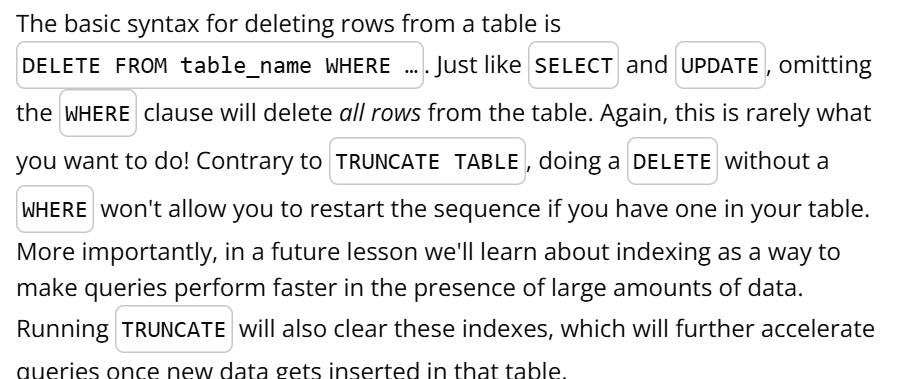

https://www.youtube.com/watch?v=CXBOftu9GgY

`DELETE` is one of the simpler commands because it's not targeting columns. The syntax is straightforward, only requiring the name of the table and, in the majority of cases, the condition for rows to be deleted.

https://www.youtube.com/watch?v=59R3ng3xbSA

In the last video, we took advantage of the simplicity of the `DELETE` syntax to take a look at an unrelated, but sometimes useful Postgres function: `pg_typeof`. This function receives a value, and returns a string with the type of the value. This can be useful if you're not certain of the type of an expression. Here, we used it to find out that subtracting two `DATE`s from each other yields a value of type `INTERVAL`.

https://www.youtube.com/watch?v=bOsHozEtzs4

Note: I say "21 days" at 0:35 in the above video instead of "21 years", as the query correctly states. My apologies for the error.

Follow this link for the full [Postgres `DELETE` documentation](https://www.postgresql.org/docs/9.6/sql-delete.html).

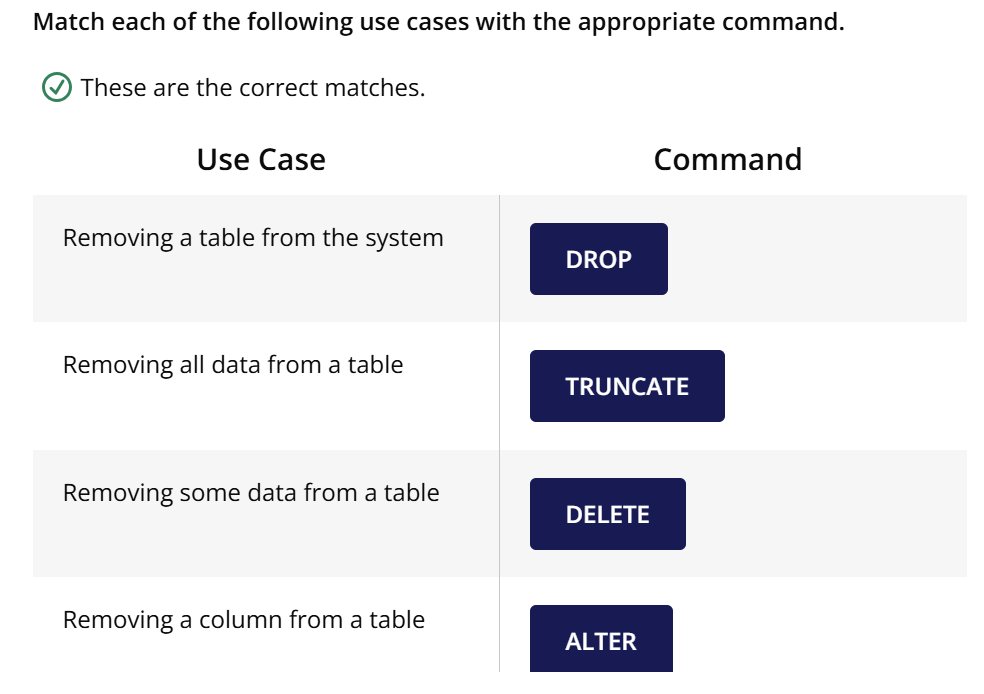

## Data Manipulation: Transactions

https://www.youtube.com/watch?v=YkdMQmaL5Wc

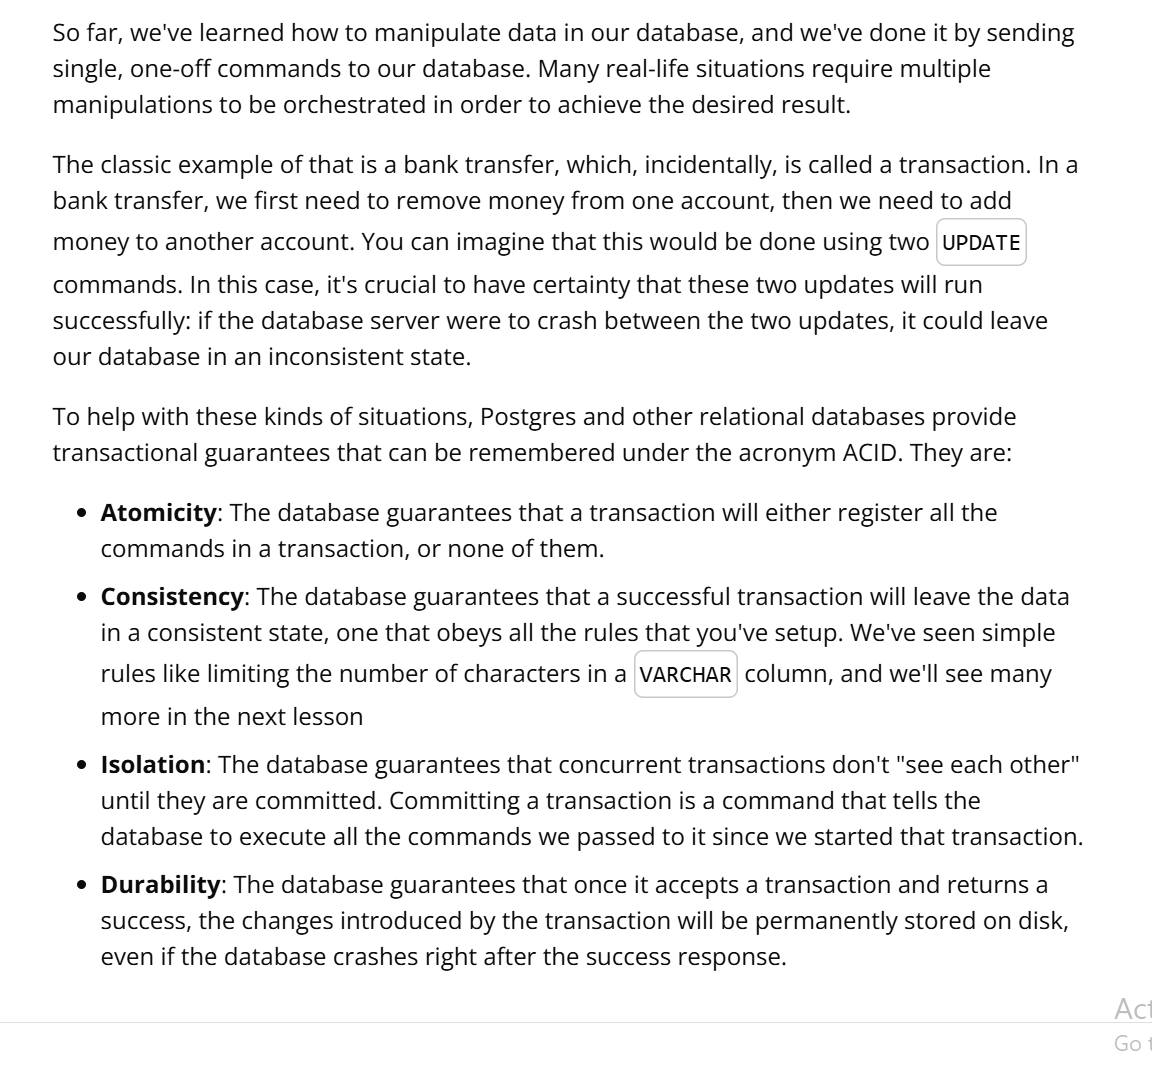

https://www.youtube.com/watch?v=rsL3ESH3vjs

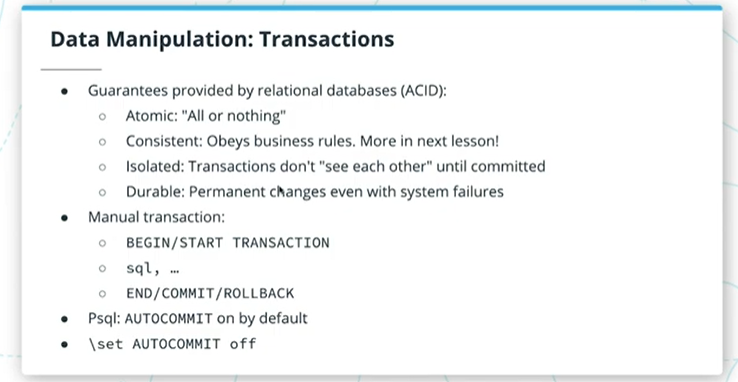

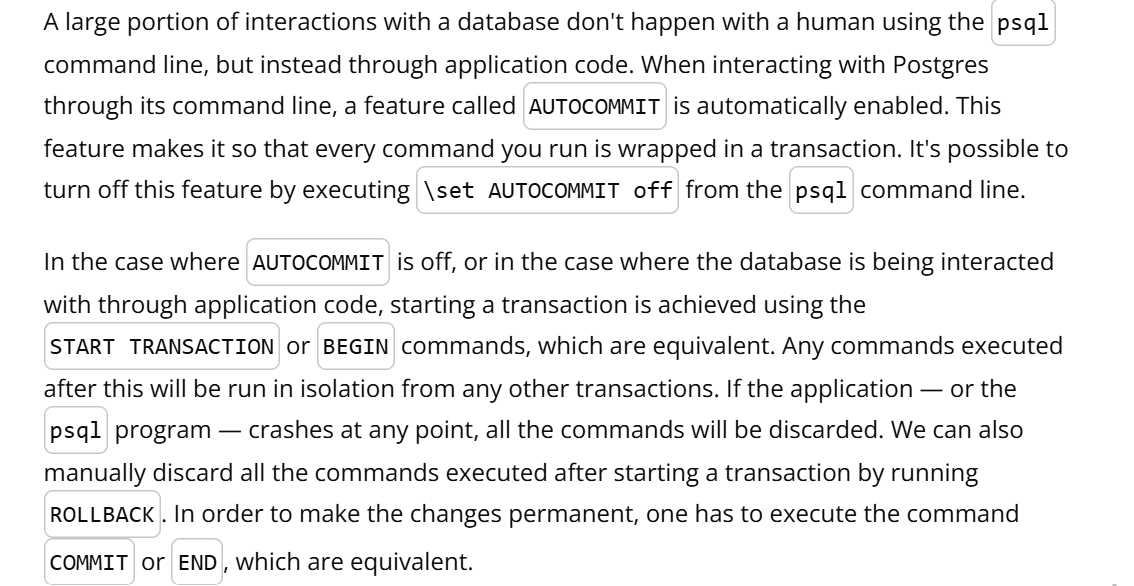

https://www.youtube.com/watch?v=mL2dvlyZ0WI

We can observe the isolation property of transactions by running two `psql` sessions and issuing commands with `AUTOCOMMIT` set to `off`. Doing so, we'll see that the commands executed in one session don't affect the data seen in the other session until we run `COMMIT`.

https://www.youtube.com/watch?v=oOdZAhb_954

We can observe the consistency property of transactions by starting one manually in `psql`, and provoking an error after executing a successful DML query. If trying to commit the semi-failed transaction, Postgres will reply with `ROLLBACK`: it will refuse to execute the whole transaction because an error happened at some point during it, thereby preserving the consistency of our data.

https://www.youtube.com/watch?v=MH8Er1nb7Nw

If you are exploring a new database that you're not familiar with and would like to see the effect of running some DML queries, make sure that you `\set AUTOCOMMIT off` before. You'll be in a much safer position, and any mistakes you make can be manually rolled back using the `ROLLBACK` command.

In the context of interacting with Postgres through an application layer, we can do the same thing: if the application detects an error condition in the middle of a transaction, it can issue a `ROLLBACK` to abort the whole transaction, and return an error to the user.

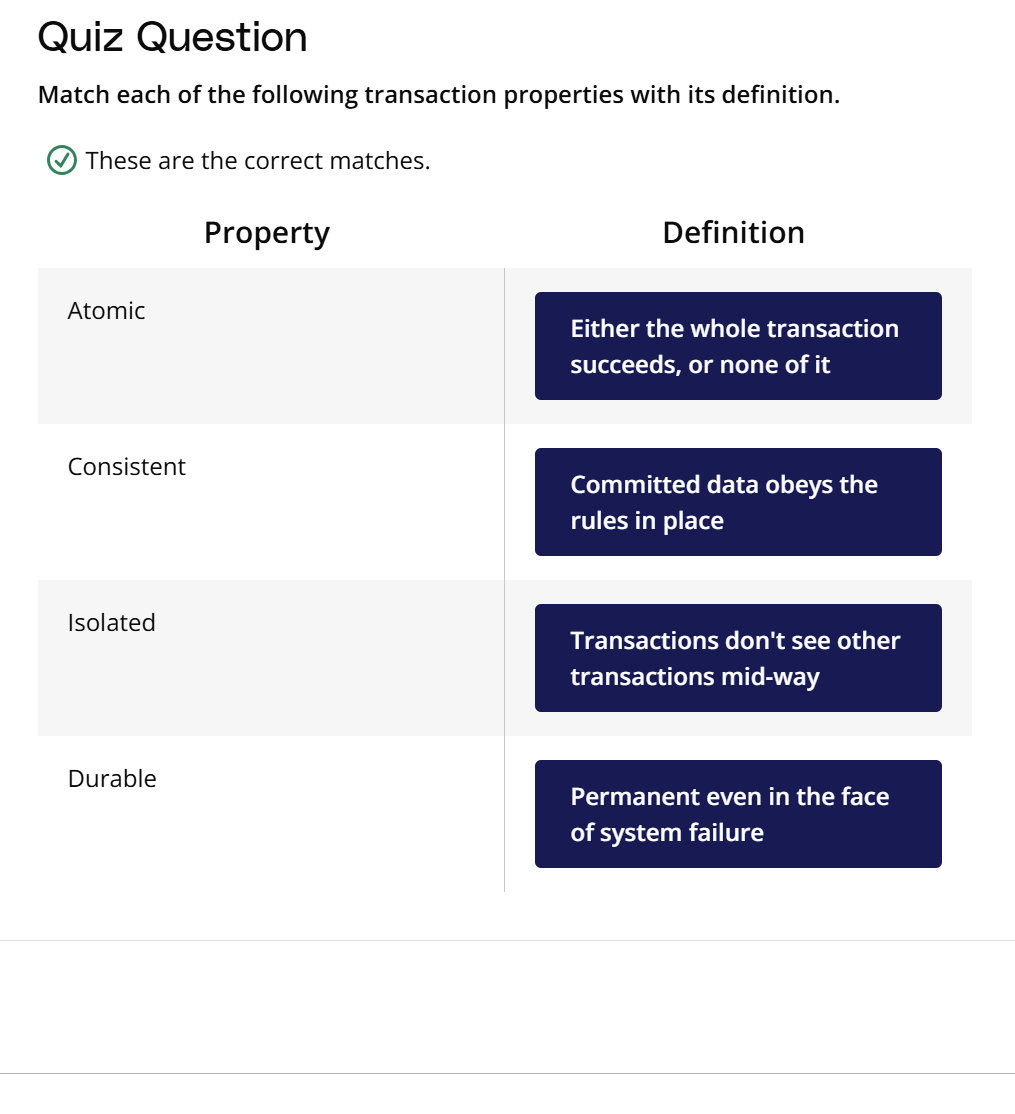

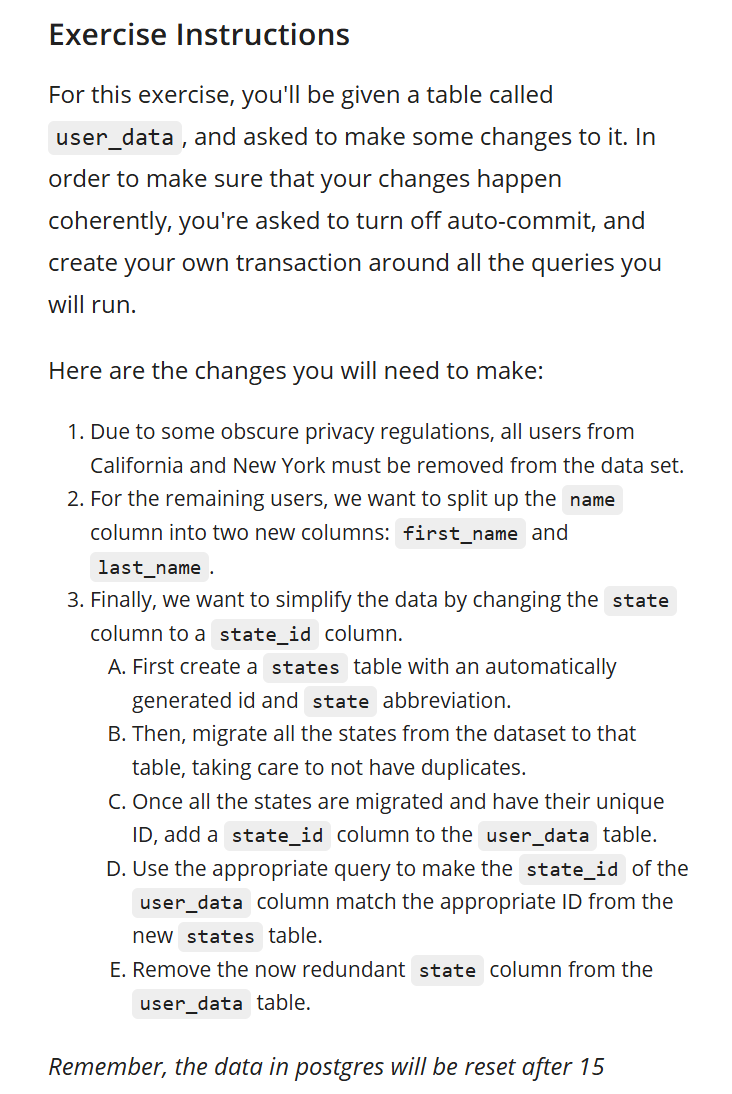

## Data Manipulation Exercise: Solution

https://www.youtube.com/watch?v=WPWituBf6pE

Remember to always run any complex manipulations in the context of a transaction!

https://www.youtube.com/watch?v=AfsNZoG7PRs

In the last video, we learned about the `SPLIT_PART` function, part of the wide-ranging array of [Postgres string functions](https://www.postgresql.org/docs/9.6/functions-string.html).

https://www.youtube.com/watch?v=kXeF7AyuO1Q

Here is the full solution to this exercise:

In [ ]:
-- Do everything in a transaction
BEGIN;


-- Remove all users from New York and California
DELETE FROM "user_data" WHERE "state" IN ('NY', 'CA');


-- Split the name column in first_name and last_name
ALTER TABLE "user_data"
  ADD COLUMN "first_name" VARCHAR,
  ADD COLUMN "last_name" VARCHAR;

UPDATE "user_data" SET
  "first_name" = SPLIT_PART("name", ' ', 1),
  "last_name" = SPLIT_PART("name", ' ', 2);

ALTER TABLE "user_data" DROP COLUMN "name";


-- Change from state to state_id
CREATE TABLE "states" (
  "id" SMALLSERIAL,
  "state" CHAR(2)
);

INSERT INTO "states" ("state")
  SELECT DISTINCT "state" FROM "user_data";

ALTER TABLE "user_data" ADD COLUMN "state_id" SMALLINT;

UPDATE "user_data" SET "state_id" = (
  SELECT "s"."id"
  FROM "states" "s"
  WHERE "s"."state" = "user_data"."state"
);

ALTER TABLE "user_data" DROP COLUMN "state";

## Data Manipulation: Recap

https://www.youtube.com/watch?v=Ys04xAFnM_E

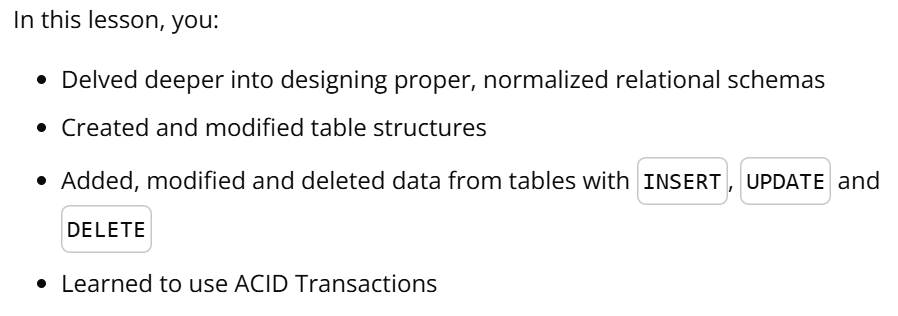

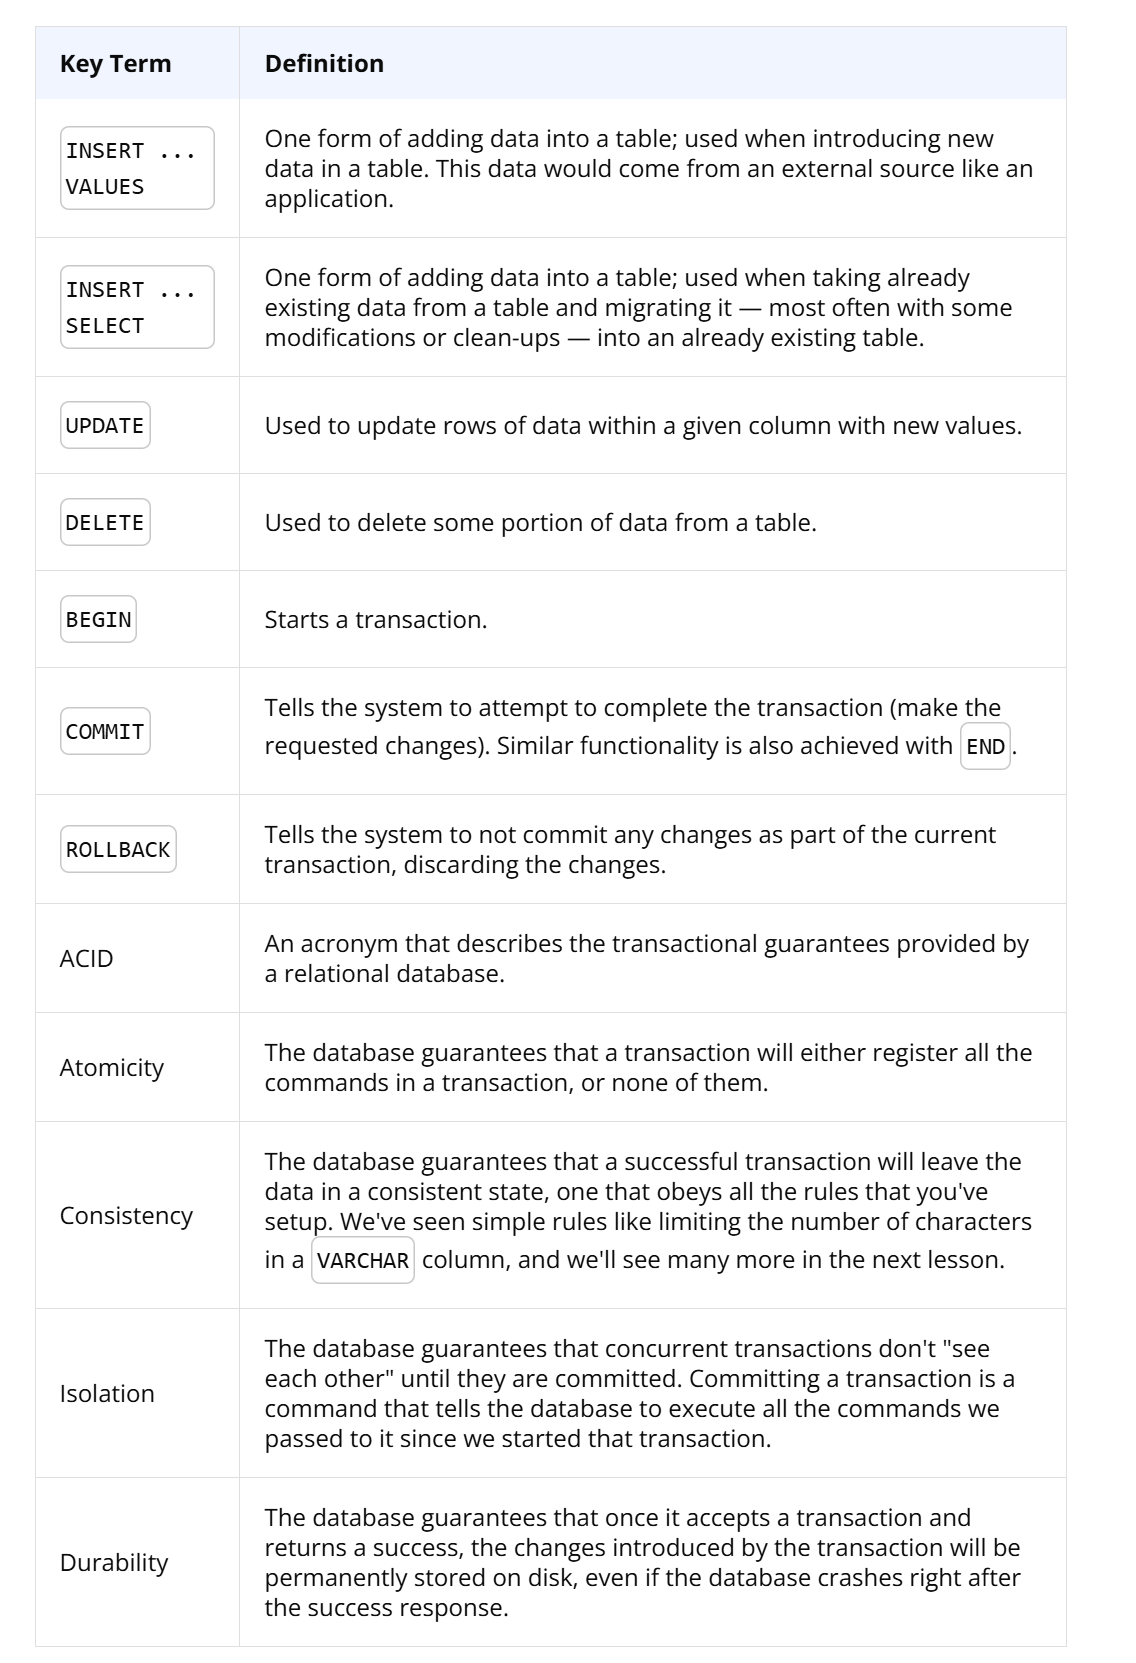